In [7]:
import pandas as pd
import matplotlib.pyplot as plt

column_names = ["Skan", "ResNeSt", "UPerNet", "DeepLabv3", "OCRNet", "3DSlicer"]

volumes = pd.read_csv('/home/budzynskaj/project/LiverCancerProject/LiverCancerSeg-Volume/volumes2.txt', sep=',', header=None, names=column_names)

numeric_columns = volumes.columns[1:]  # all columns except "Skan"
numeric_data = volumes[numeric_columns].apply(pd.to_numeric, errors='coerce') 

print(numeric_data)

      ResNeSt    UPerNet  DeepLabv3     OCRNet   3DSlicer
0    17322.11   17304.86    8768.83   20101.35   14964.60
1    74313.75   73618.88   37130.52   92296.38  122428.00
2      803.30     376.92     327.45     402.83       0.00
3      293.92     122.47     504.27     474.01     948.03
4    94998.68   95279.16   59507.23  152932.43  122038.00
5   139943.16   25698.51   73940.47   74001.41   30727.40
6     9509.05    1812.58   45899.98    1488.40    1124.58
7    11307.91    5436.52    4049.34   12676.39   15794.10
8   306002.08  263887.82  152927.93  345616.88  265146.00
9   198655.75  158275.28  106658.46  208483.22  229770.00
10     562.24    1555.14     439.20    1189.43    5234.93
11   17223.87   16419.07    2845.07   16580.57   14924.50


In [23]:
import numpy as np
import pandas as pd

# Dane wejściowe
data = [
    ["volume-8", 17322.11, 17304.86, 8768.83, 20101.35, 14964.60],
    ["volume-90", 74313.75, 73618.88, 37130.52, 92296.38, 122428.00],
    ["volume-91", 803.30, 376.92, 327.45, 402.83, 0.00],
    ["volume-92", 293.92, 122.47, 504.27, 474.01, 948.03],
    ["volume-93", 94998.68, 95279.16, 59507.23, 152932.43, 122038.00],
    ["volume-94", 139943.16, 25698.51, 73940.47, 74001.41, 30727.40],
    ["volume-95", 9509.05, 1812.58, 45899.98, 1488.40, 1124.58],
    ["volume-96", 11307.91, 5436.52, 4049.34, 12676.39, 15794.10],
    ["volume-97", 306002.08, 263887.82, 152927.93, 345616.88, 265146.00],
    ["volume-98", 198655.75, 158275.28, 106658.46, 208483.22, 229770.00],
    ["volume-99", 562.24, 1555.14, 439.20, 1189.43, 5234.93],
    ["volume-9", 17223.87, 16419.07, 2845.07, 16580.57, 14924.50]
]


df = pd.DataFrame(data, columns=["Skan", "ResNeSt", "UPerNet", "DeepLabv3", "OCRNet", "3DSlicer (referencja)"])

def standardize_row(row):
    values = row[1:-1] 
    mean = np.mean(values)
    std = np.std(values)
    if std != 0:
        standardized_values = (values - mean) / std
    else:
        standardized_values = values - mean 
    return standardized_values


standardized_values = df.apply(standardize_row, axis=1)

df_standardized = pd.concat([df["Skan"], standardized_values, df["3DSlicer (referencja)"]], axis=1)
df_standardized.columns = df.columns

df_standardized["3DSlicer (referencja)"] = 0.00

print(df_standardized)

df_standardized.to_csv("/home/budzynskaj/project/LiverCancerProject/LiverCancerSeg-Volume/df_standardized.txt", index=False)


         Skan   ResNeSt   UPerNet  DeepLabv3    OCRNet  3DSlicer (referencja)
0    volume-8  0.340080  0.336028  -1.669007  0.992898                    0.0
1   volume-90  0.248113  0.213451  -1.606710  1.145147                    0.0
2   volume-91  1.714361 -0.530113  -0.790525 -0.393723                    0.0
3   volume-92 -0.356971 -1.474879   1.014578  0.817273                    0.0
4   volume-93 -0.169612 -0.161237  -1.229299  1.560147                    0.0
5   volume-94  1.514702 -1.296903  -0.109650 -0.108150                    0.0
6   volume-95 -0.282276 -0.702620   1.705221 -0.720325                    0.0
7   volume-96  0.796956 -0.794422  -1.170402  1.167868                    0.0
8   volume-97  0.540344 -0.044747  -1.586308  1.090711                    0.0
9   volume-98  0.763793 -0.242890  -1.529694  1.008791                    0.0
10  volume-99 -0.819607  1.354771  -1.089056  0.553893                    0.0
11   volume-9  0.656749  0.523166  -1.729887  0.549972          

In [2]:
# absolute sum values for all colums except "Skan" and "3DSlicer (referencja)"
abs_sum_values = df_standardized.iloc[:, 1:-1].apply(lambda x: np.sum(np.abs(x)))
print(abs_sum_values)

min_abs_sum_column = abs_sum_values.idxmin()

print("Kolumna, dla której wartości bezwzględne są najmniejsze:", min_abs_sum_column)

ResNeSt       8.203565
UPerNet       7.675227
DeepLabv3    15.230336
OCRNet       10.108897
dtype: float64
Kolumna, dla której wartości bezwzględne są najmniejsze: UPerNet


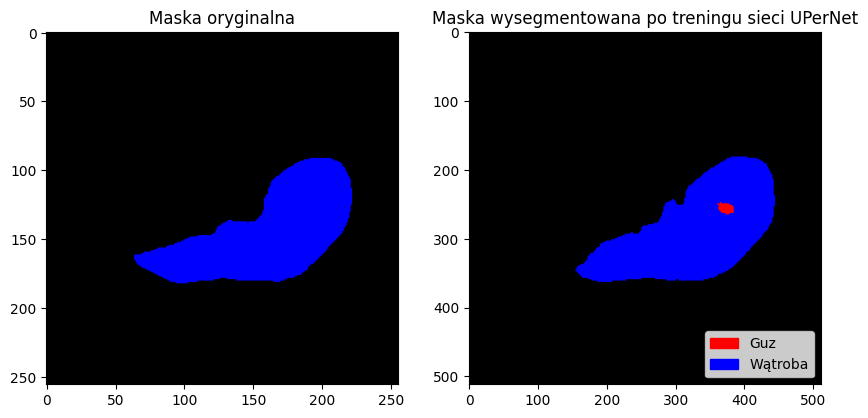

In [11]:

import cv2
import mmcv
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

upernet_path = '/home/budzynskaj/project/LiverCancerProject/data/d/dane/results/upernet-aug-42000-512/volume-95_478_seg.png'

path = "/home/budzynskaj/project/LiverCancerProject/data/d/dane/volume_labels/segmentation-95_478.png" 

upernet_image = mmcv.imread(upernet_path)
original_image = img = mmcv.imread(path)

original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(original_image_rgb)
plt.title('Maska oryginalna')

plt.subplot(1, 2, 2)
plt.imshow(upernet_image)
plt.title('Maska wysegmentowana po treningu sieci UPerNet')

red_patch = mpatches.Patch(color='red', label='Guz')
blue_patch = mpatches.Patch(color='blue', label='Wątroba')


plt.legend(handles=[red_patch, blue_patch], loc='lower right')

plt.show()